# Week9 - Ensemble Assignment

1. Train Model
* Train-test split
* Train a random forest model
* Try bagging & boosting algorithms
* Evaluate the models
* Explain findings
* Save the best model

2. In a new notebook, load the saved model
* Evaluate your results data with `generate_dataset_prod()`

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [59]:
from sklearn.datasets import make_moons
from sklearn.datasets import make_circles

def generate_dataset(sample=1000, random_state=42):   
    X, y = make_circles(n_samples=sample,noise=0.1, random_state=random_state)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    
    X1, y1 = make_moons(n_samples=sample, noise=0.1, random_state=random_state)
    df2 = pd.DataFrame(X1)
    df2['y'] = y
    
    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

# production data - use this in the new notebook with the saved model
def generate_dataset_prod(sample=300, random_state=60):   
    X, y = make_circles(n_samples=sample,noise=0.1, random_state=random_state)
    df1 = pd.DataFrame(X)
    df1['y'] = y
    
    X1, y1 = make_moons(n_samples=sample, noise=0.1, random_state=random_state)
    df2 = pd.DataFrame(X1)
    df2['y'] = y
    
    df = pd.concat([df1, df2])
    df = df.sample(frac=1).reset_index(drop=True)
    return df[[0,1]].to_numpy(), df.y

In [61]:
X, y = generate_dataset()

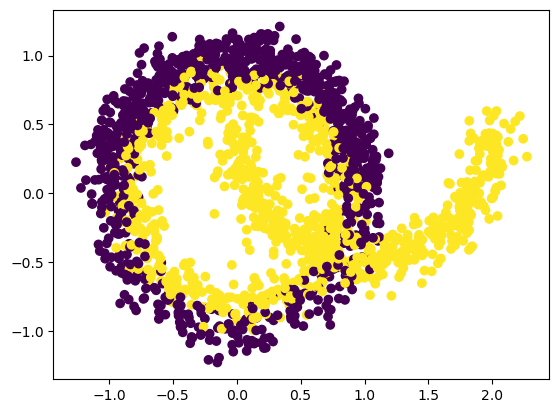

In [52]:
plt.scatter(X[:,0], X[:,1],c=y)
plt.show()

In [53]:
y.value_counts()

y
1    1000
0    1000
Name: count, dtype: int64

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import joblib

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_acc = accuracy_score(y_test, rf_pred)

# Train Bagging Classifier
bag_model = BaggingClassifier(random_state=42)
bag_model.fit(X_train, y_train)
bag_pred = bag_model.predict(X_test)
bag_acc = accuracy_score(y_test, bag_pred)

# Train Boosting Classifier (AdaBoost)
boost_model = AdaBoostClassifier(algorithm='SAMME', random_state=42)
boost_model.fit(X_train, y_train)
boost_pred = boost_model.predict(X_test)
boost_acc = accuracy_score(y_test, boost_pred)

# Create evaluation summary table
evaluation_data = {
    "Model": ["Random Forest", "Bagging", "Boosting (AdaBoost)"],
    "Accuracy": [rf_acc, bag_acc, boost_acc],
    "Precision (Class 1)": [
        precision_score(y_test, rf_pred, pos_label=1),
        precision_score(y_test, bag_pred, pos_label=1),
        precision_score(y_test, boost_pred, pos_label=1)
    ],
    "Recall (Class 1)": [
        recall_score(y_test, rf_pred, pos_label=1),
        recall_score(y_test, bag_pred, pos_label=1),
        recall_score(y_test, boost_pred, pos_label=1)
    ],
    "F1 Score (Class 1)": [
        f1_score(y_test, rf_pred, pos_label=1),
        f1_score(y_test, bag_pred, pos_label=1),
        f1_score(y_test, boost_pred, pos_label=1)
    ]
}

evaluation_df = pd.DataFrame(evaluation_data)
evaluation_df



,Model,Accuracy,Precision (Class 1),Recall (Class 1),F1 Score (Class 1)
0,Random Forest,0.8675,0.849462,0.863388,0.856369
1,Bagging,0.8550,0.849162,0.830601,0.839779
2,Boosting (AdaBoost),0.8250,0.815642,0.797814,0.806630


In [65]:
# find the best model
best_index = evaluation_df["Accuracy"].idxmax()
best_model_name = evaluation_df.loc[best_index, "Model"]

model_dict = {
    "Random Forest": rf_model,
    "Bagging": bag_model,
    "Boosting (AdaBoost)": boost_model,
}

best_model = model_dict[best_model_name]
print(f"Best model: {best_model_name}")


Best model: Random Forest


In [67]:
# Save the best model
joblib.dump(best_model, "best_model.pkl")

['best_model.pkl']